Import Libraries

In [120]:
import matplotlib
import networkx as nx
import urllib
import csv
import matplotlib.pyplot as plt
import numpy as np

Creation of a dictionary that saves the calculated information

In [95]:
directed_graph_info = {
}
undirected_graph_info = {
}

## Directed Graph - Cit-HepTh

Reading  Cit-HepTh graph (Directed)

In [96]:
g = nx.read_edgelist("Cit-HepTh.txt",create_using=nx.DiGraph(), nodetype = int)

Number of Nodes and Edges

In [97]:
# Count the number of nodes
print("Number of nodes:", g.number_of_nodes())

# Count the number of edges
print("Number of edges:", g.number_of_edges())

directed_graph_info["nodes"] = g.number_of_nodes()
directed_graph_info["edges"] = g.number_of_edges()

Number of nodes: 27770
Number of edges: 352807


Reciprocal Edges

In [98]:
# Count the number of reciprocal edges
reciprocity = nx.reciprocity(g)
total_edges = g.number_of_edges()
reciprocal_edges_count = int(reciprocity * total_edges)

directed_graph_info["reciprocal_edges"] = reciprocal_edges_count

print("Number of reciprocal edges:", reciprocal_edges_count)

Number of reciprocal edges: 966


Sink and Source nodes

In [99]:
# Find source and sink nodes
source_nodes = [node for node, degree in g.in_degree() if degree == 0]
sink_nodes = [node for node, degree in g.out_degree() if degree == 0]

directed_graph_info["source_nodes"] = len(source_nodes)
directed_graph_info["sink_nodes"] = len(sink_nodes)

print("Number of source nodes:", len(source_nodes))
print("Number of sink nodes:", len(sink_nodes))

Number of source nodes: 4590
Number of sink nodes: 2711


Min, Max, Average Degree

In [100]:
# Calculate the degree for each node
degrees = dict(g.degree())

# Calculate min, max, and average degree
min_degree = min(degrees.values())
max_degree = max(degrees.values())
average_degree = sum(degrees.values()) / len(degrees)

directed_graph_info["min_degree"] = min_degree
directed_graph_info["max_degree"] = max_degree
directed_graph_info["avg_degree"] = average_degree

print("Minimum degree of the graph:", min_degree)
print("Maximum degree of the graph:", max_degree)
print("Average degree of the graph:", average_degree)

Minimum degree of the graph: 1
Maximum degree of the graph: 2468
Average degree of the graph: 25.409218581202737


Min, Max, Average Degree (Incoming edges only!)

In [101]:
# Calculate the in-degree for each node
in_degrees = dict(g.in_degree())

# Calculate min, max, and average in-degree
min_in_degree = min(in_degrees.values())
max_in_degree = max(in_degrees.values())
average_in_degree = sum(in_degrees.values()) / len(in_degrees)

directed_graph_info["min_in_degree"] = min_in_degree
directed_graph_info["max_in_degree"] = max_in_degree
directed_graph_info["avg_in_degree"] = average_in_degree


print("Minimum in-degree of the graph:", min_in_degree)
print("Maximum in-degree of the graph:", max_in_degree)
print("Average in-degree of the graph:", average_in_degree)

Minimum in-degree of the graph: 0
Maximum in-degree of the graph: 2414
Average in-degree of the graph: 12.704609290601368


Min, Max, Average Degree (Outcoming edges only!)

In [102]:
# Calculate the out-degree for each node
out_degrees = dict(g.out_degree())

# Calculate min, max, and average out-degree
min_out_degree = min(out_degrees.values())
max_out_degree = max(out_degrees.values())
average_out_degree = sum(out_degrees.values()) / len(out_degrees)

directed_graph_info["min_out_degree"] = min_out_degree
directed_graph_info["max_out_degree"] = max_out_degree
directed_graph_info["avg_out_degree"] = average_out_degree

print("Minimum out-degree of the graph:", min_out_degree)
print("Maximum out-degree of the graph:", max_out_degree)
print("Average out-degree of the graph:", average_out_degree)

Minimum out-degree of the graph: 0
Maximum out-degree of the graph: 562
Average out-degree of the graph: 12.704609290601368


Network Diameter

In [104]:
# Find the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(g), key=len)

# Create a subgraph consisting only of the largest SCC
scc_graph = g.subgraph(largest_scc)

# Calculate the network diameter of the largest SCC
try:
    diameter = nx.diameter(scc_graph)
    print("Network diameter of the largest strongly connected component:", diameter)
except nx.NetworkXError:
    print("The largest strongly connected component is empty. Diameter cannot be calculated.")


directed_graph_info["network_diameter"] = diameter

Network diameter of the largest strongly connected component: 35


Average and Global Clustering Coefficient

In [105]:
# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(g)

# Calculate the global clustering coefficient
global_clustering = nx.transitivity(g)

directed_graph_info["avg_clustering_coefficient"] = average_clustering
directed_graph_info["global_clustering_coefficient"] = global_clustering

print("Average clustering coefficient:", average_clustering)
print("Global clustering coefficient:", global_clustering)

Average clustering coefficient: 0.15692528842352427
Global clustering coefficient: 0.13276997672801327


Max strongly connected coefficient

In [106]:
# Calculate the number of nodes and edges in the largest SCC
num_nodes_largest_scc = scc_graph.number_of_nodes()
num_edges_largest_scc = scc_graph.number_of_edges()

directed_graph_info["max_scc_nodes"] = num_nodes_largest_scc
directed_graph_info["max_scc_edges"] = num_edges_largest_scc

print("Number of nodes in the largest strongly connected component:", num_nodes_largest_scc)
print("Number of edges in the largest strongly connected component:", num_edges_largest_scc)

Number of nodes in the largest strongly connected component: 7464
Number of edges in the largest strongly connected component: 116268


Max weakly connected coefficient

In [107]:
# Find the weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(g))

# Find the largest weakly connected component
largest_wcc = max(weakly_connected_components, key=len)

# Create a subgraph consisting only of the largest WCC
wcc_graph = g.subgraph(largest_wcc)

# Calculate the number of nodes and edges in the largest WCC
largest_wcc_nodes = len(largest_wcc)
largest_wcc_edges = wcc_graph.number_of_edges()


directed_graph_info["max_wcc_nodes"] = largest_wcc_nodes
directed_graph_info["max_wcc_edges"] = largest_wcc_edges

print("Size of the largest weakly connected component:")
print("Number of nodes:", largest_wcc_nodes)
print("Number of edges:", largest_wcc_edges)

Size of the largest weakly connected component:
Number of nodes: 27400
Number of edges: 352542


In [108]:
directed_graph_info

{'nodes': 27770,
 'edges': 352807,
 'reciprocal_edges': 966,
 'source_nodes': 4590,
 'sink_nodes': 2711,
 'min_degree': 1,
 'max_degree': 2468,
 'avg_degree': 25.409218581202737,
 'min_in_degree': 0,
 'max_in_degree': 2414,
 'avg_in_degree': 12.704609290601368,
 'min_out_degree': 0,
 'max_out_degree': 562,
 'avg_out_degree': 12.704609290601368,
 'network_diameter': 35,
 'avg_clustering_coefficient': 0.15692528842352427,
 'global_clustering_coefficient': 0.13276997672801327,
 'max_scc_nodes': 7464,
 'max_scc_edges': 116268,
 'max_wcc_nodes': 27400,
 'max_wcc_edges': 352542}

## Undirected Graph - CA-HepTh

Reading  CA-HepTh graph (Undirected)

In [126]:
g = nx.read_edgelist("CA-HepTh.txt", nodetype = int)

Number of Nodes and Edges

In [127]:
# Count the number of nodes
print("Number of nodes:", g.number_of_nodes())

# Count the number of edges
print("Number of edges:", g.number_of_edges())

undirected_graph_info["nodes"] = g.number_of_nodes()
undirected_graph_info["edges"] = g.number_of_edges()

Number of nodes: 9877
Number of edges: 25998


Reciprocal Edges

In [128]:
# Reciprocal edges do not directly apply to undirected graphs
# COnsider all edges to be reciprocal on the undirected graph

reciprocal_edges_count = g.number_of_edges()

undirected_graph_info["reciprocal_edges"] = reciprocal_edges_count

print("Number of reciprocal edges:", reciprocal_edges_count)

Number of reciprocal edges: 25998


Sink and Source nodes

In [129]:
# Source and Sink nodes do not apply in undirected graphs

undirected_graph_info["source_nodes"] = "NA"
undirected_graph_info["sink_nodes"] = "NA"

print("Number of source nodes: NA " )
print("Number of sink nodes: NA ")

Number of source nodes: NA 
Number of sink nodes: NA 


Min, Max, Average Degree

In [130]:
# Calculate the degree for each node
degrees = dict(g.degree())

# Calculate min, max, and average degree
min_degree = min(degrees.values())
max_degree = max(degrees.values())
average_degree = sum(degrees.values()) / len(degrees)

undirected_graph_info["min_degree"] = min_degree
undirected_graph_info["max_degree"] = max_degree
undirected_graph_info["avg_degree"] = average_degree

print("Minimum degree of the graph:", min_degree)
print("Maximum degree of the graph:", max_degree)
print("Average degree of the graph:", average_degree)

Minimum degree of the graph: 1
Maximum degree of the graph: 65
Average degree of the graph: 5.264351523742027


Min, Max, Average Degree (Incoming edges only!)

In [131]:
# In the undirected graph, the edges are not separated in incoming and outcoming
# The calculation of the degree for incoming/ outcoming edges only does not apply here

undirected_graph_info["min_in_degree"] = "NA"
undirected_graph_info["max_in_degree"] = "NA"
undirected_graph_info["avg_in_degree"] = "NA"


print("Minimum in-degree of the graph: NA")
print("Maximum in-degree of the graph: NA ")
print("Average in-degree of the graph: NA ")

Minimum in-degree of the graph: NA
Maximum in-degree of the graph: NA 
Average in-degree of the graph: NA 


Min, Max, Average Degree (Outcoming edges only!)

In [132]:
undirected_graph_info["min_out_degree"] = "NA"
undirected_graph_info["max_out_degree"] = "NA"
undirected_graph_info["avg_out_degree"] = "NA"


print("Minimum out-degree of the graph: NA")
print("Maximum out-degree of the graph: NA ")
print("Average out-degree of the graph: NA ")

Minimum out-degree of the graph: NA
Maximum out-degree of the graph: NA 
Average out-degree of the graph: NA 


Network Diameter

In [82]:
# Find the connected components in the graph
connected_components = list(nx.connected_components(g))

# Initialize a variable to store the maximum diameter
max_diameter = 0

# Iterate over each connected component and calculate its diameter
for component in connected_components:
    # Create a subgraph containing only the nodes from the current component
    subgraph = g.subgraph(component)

    # Calculate the diameter of the subgraph
    diameter = nx.diameter(subgraph)

    # Update the maximum diameter if necessary
    max_diameter = max(max_diameter, diameter)

print("Maximum diameter of the graph:", max_diameter)


undirected_graph_info["network_diameter"] = max_diameter

Maximum diameter of the graph: 18


Average and Global Clustering Coefficient

In [135]:
# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(g)

# Calculate the global clustering coefficient
global_clustering = nx.transitivity(g)

undirected_graph_info["avg_clustering_coefficient"] = average_clustering
undirected_graph_info["global_clustering_coefficient"] = global_clustering

print("Average clustering coefficient:", average_clustering)
print("Global clustering coefficient:", global_clustering)

Average clustering coefficient: 0.4714390529669332
Global clustering coefficient: 0.2839996525875546


Max strongly connected coefficient

In [136]:
# An undireted graph can;t strongly or weakly connected. It is either connected or not
# The entries Max strongly connected coeficient and Largest weakly connected coefficient do
# not apply on this graph

undirected_graph_info["max_scc_nodes"] = "NA"
undirected_graph_info["max_scc_edges"] = "NA"


Max weakly connected coefficient

In [137]:
undirected_graph_info["max_wcc_nodes"] = "NA"
undirected_graph_info["max_wcc_edges"] = "NA"

In [138]:
undirected_graph_info

{'nodes': 9877,
 'edges': 25998,
 'reciprocal_edges': 25998,
 'source_nodes': 'NA',
 'sink_nodes': 'NA',
 'min_degree': 1,
 'max_degree': 65,
 'avg_degree': 5.264351523742027,
 'min_in_degree': 'NA',
 'max_in_degree': 'NA',
 'avg_in_degree': 'NA',
 'min_out_degree': 'NA',
 'max_out_degree': 'NA',
 'avg_out_degree': 'NA',
 'network_diameter': 18,
 'avg_clustering_coefficient': 0.4714390529669332,
 'global_clustering_coefficient': 0.2839996525875546,
 'max_scc_nodes': 'NA',
 'max_scc_edges': 'NA',
 'max_wcc_nodes': 'NA',
 'max_wcc_edges': 'NA'}

## Plots

### Distribution of Node Degree - Linear Scale

DIRECTED GRAPH

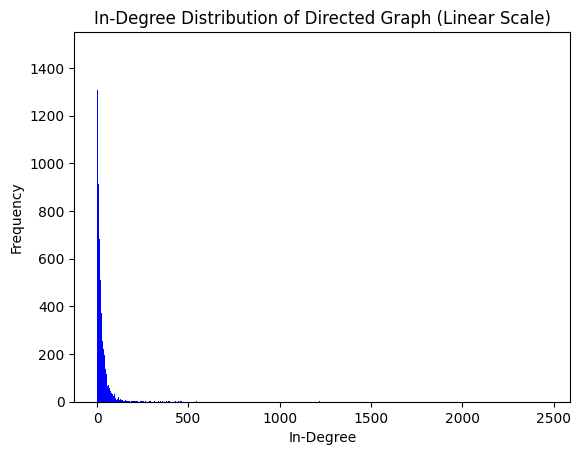

In [114]:
# Read your directed graph from a file or create it in some other way
directed_graph =  nx.read_edgelist("Cit-HepTh.txt",create_using=nx.DiGraph(), nodetype = int)

# Get the degree sequence
degree_sequence = [d for n, d in directed_graph.degree()]

# Calculate the in-degree histogram
degree_hist = nx.degree_histogram(directed_graph)

# Plot the histogram
plt.bar(range(len(degree_hist)), degree_hist, color='b', width=1.0)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution of Directed Graph (Linear Scale)')
plt.show()


UNDIRECTED GRAPH

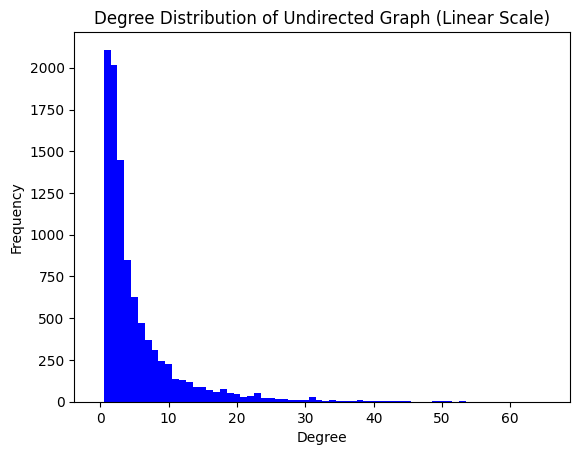

In [112]:
undirected_graph = nx.read_edgelist("CA-HepTh.txt", nodetype = int)

# Get the degree sequence (list of degrees of nodes)
undirected_degree_sequence = [d for n, d in undirected_graph.degree()]

# Calculate the degree histogram
undirected_degree_hist = nx.degree_histogram(undirected_graph)

# Plot the histogram
plt.bar(range(len(undirected_degree_hist)), undirected_degree_hist, color='b', width=1.0)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Undirected Graph (Linear Scale)')
plt.show()


### Distribution of Node Degree - Log Scale

DIRECTED GRAPH

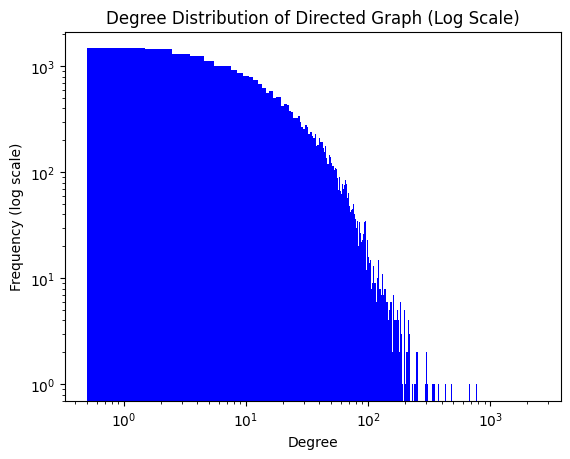

In [145]:
# Calculate the in-degree histogram
degree_hist = nx.degree_histogram(directed_graph)

# Plot the histogram in log scale
plt.bar(range(len(degree_hist)), degree_hist, color='b', width=1.0)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution of Directed Graph (Log Scale)')
plt.show()

UNDIRECTED GRAPH

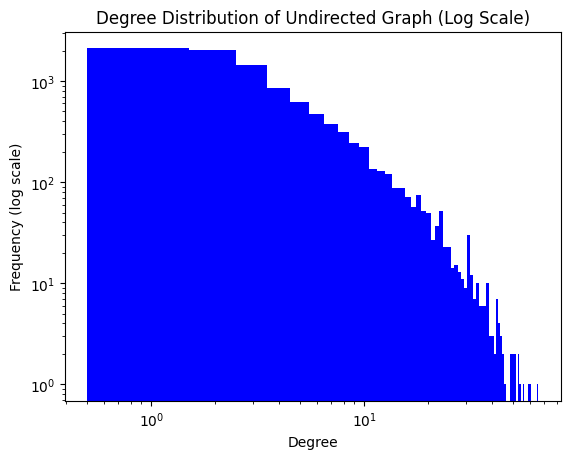

In [142]:
# Get the degree sequence (list of degrees of nodes)
undirected_degree_sequence = [d for n, d in undirected_graph.degree()]

# Calculate the degree histogram
undirected_degree_hist = nx.degree_histogram(undirected_graph)

# Plot the histogram in log scale
plt.bar(range(len(undirected_degree_hist)), undirected_degree_hist, color='b', width=1.0)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution of Undirected Graph (Log Scale)')
plt.show()

### Distribution of Node Degree using Log Binning - Log Scale

DIRECTED GRAPH

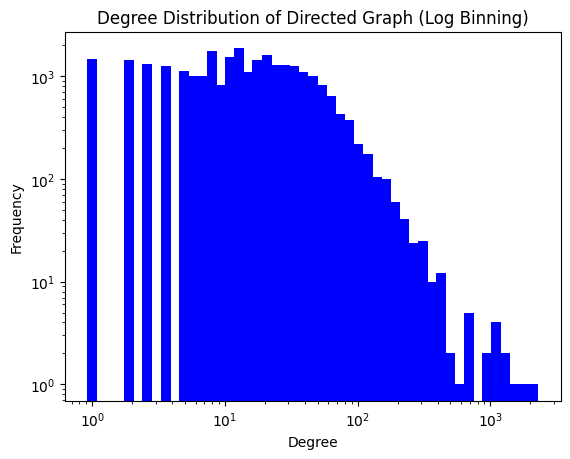

In [124]:
# Get the in-degree sequence (list of in-degrees of nodes)
degree_sequence = [d for n, d in directed_graph.degree()]

# Calculate the logarithmically spaced bins
log_bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=50)

# Create the histogram using log binning
hist, bins = np.histogram(degree_sequence, bins=log_bins)

# Plot the histogram using log scale on both x and y axes
plt.bar(bins[:-1], hist, width=np.diff(bins), color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Directed Graph (Log Binning)')
plt.show()

UNDIRECTED GRAPH

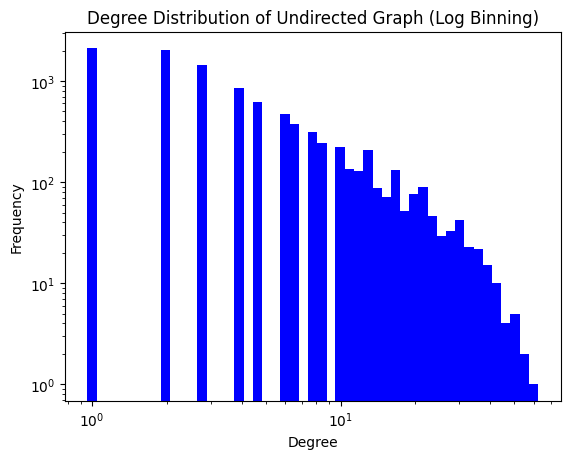

In [125]:
# Get the degree sequence (list of degrees of nodes)
degree_sequence = [d for n, d in undirected_graph.degree()]

# Calculate the logarithmically spaced bins
log_bins = np.logspace(np.log10(min(degree_sequence)), np.log10(max(degree_sequence)), num=50)

# Create the histogram using log binning
hist, bins = np.histogram(degree_sequence, bins=log_bins)

# Plot the histogram using log scale on both x and y axes
plt.bar(bins[:-1], hist, width=np.diff(bins), color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Undirected Graph (Log Binning)')
plt.show()

### Scatterplot for (# of nodes with degree r , degree r) - Log Scale

DIRECTED GRAPH
Three (3) scatterplots are created: degree, in-degree and out-degree


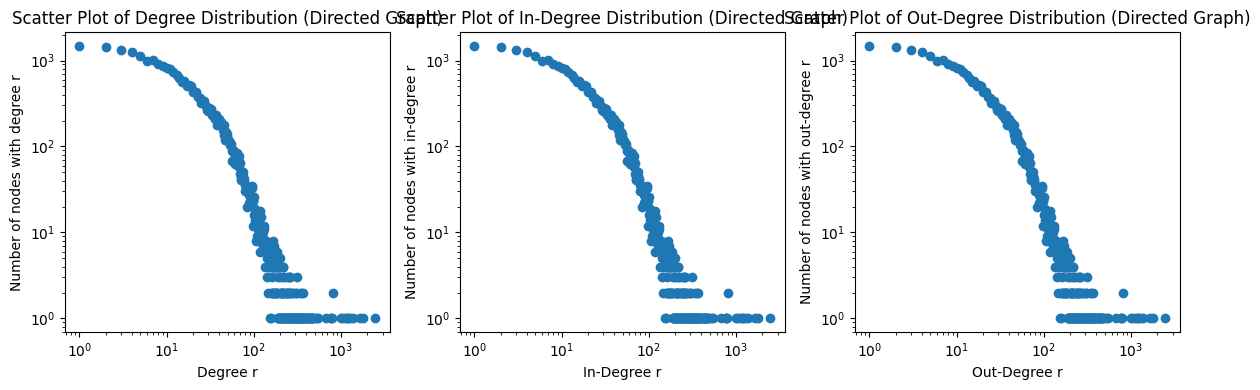

In [139]:
# Get the degree, in-degree, and out-degree of each node
degree_sequence = [d for n, d in directed_graph.degree()]
in_degree_sequence = [d for n, d in directed_graph.in_degree()]
out_degree_sequence = [d for n, d in directed_graph.out_degree()]

# Count the number of nodes with each degree
degree_counts = nx.degree_histogram(directed_graph)
in_degree_counts = nx.degree_histogram(directed_graph)
out_degree_counts = nx.degree_histogram(directed_graph)

# Filter out nodes with degree r = 0 and number of nodes = 0
valid_degrees = [(deg, count) for deg, count in enumerate(degree_counts) if deg > 0 and count > 0]
valid_in_degrees = [(deg, count) for deg, count in enumerate(in_degree_counts) if deg > 0 and count > 0]
valid_out_degrees = [(deg, count) for deg, count in enumerate(out_degree_counts) if deg > 0 and count > 0]

# Extract x and y values for scatter plot
x_values, y_values = zip(*valid_degrees)
x_in_values, y_in_values = zip(*valid_in_degrees)
x_out_values, y_out_values = zip(*valid_out_degrees)

# Plot the scatter plot for degree
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_values, y_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree r')
plt.ylabel('Number of nodes with degree r')
plt.title('Scatter Plot of Degree Distribution ')

# Plot the scatter plot for in-degree
plt.subplot(1, 3, 2)
plt.scatter(x_in_values, y_in_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In-Degree r')
plt.ylabel('Number of nodes with in-degree r')
plt.title('Scatter Plot of In-Degree Distribution ')

# Plot the scatter plot for out-degree
plt.subplot(1, 3, 3)
plt.scatter(x_out_values, y_out_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Out-Degree r')
plt.ylabel('Number of nodes with out-degree r')
plt.title('Scatter Plot of Out-Degree Distribution ')

plt.tight_layout()
plt.show()

UNDIRECTED GRAPH
Only one diagram created

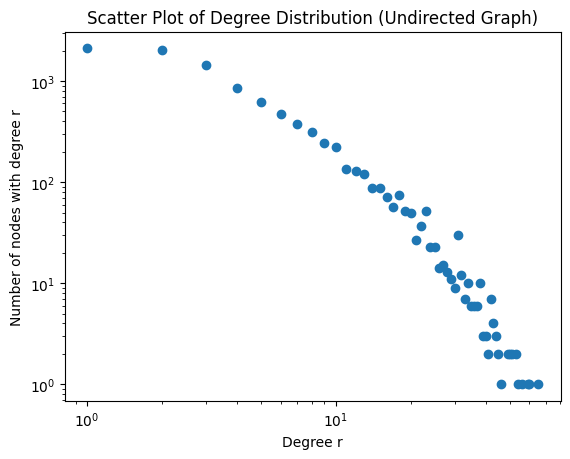

In [140]:
# Get the degree of each node
degree_sequence = [d for n, d in undirected_graph.degree()]

# Count the number of nodes with each degree
degree_counts = nx.degree_histogram(undirected_graph)

# Filter out nodes with degree r = 0 and number of nodes = 0
valid_degrees = [(deg, count) for deg, count in enumerate(degree_counts) if deg > 0 and count > 0]

# Extract x and y values for scatter plot
x_values, y_values = zip(*valid_degrees)

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree r')
plt.ylabel('Number of nodes with degree r')
plt.title('Scatter Plot of Degree Distribution (Undirected Graph)')
plt.show()

### Scatterplot for (coefficient size i , number of coefficients with size i)

DIRECTED GRAPH

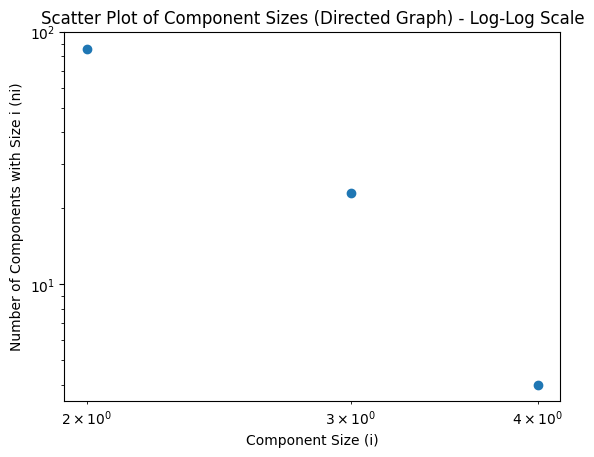

In [147]:
# Get the strongly connected components
components = nx.strongly_connected_components(directed_graph)

# Initialize dictionaries to store the size of each component and the number of components with that size
component_sizes = {}
component_counts = {}

# Iterate over the components and count their sizes
for component in components:
    size = len(component)
    if size not in component_sizes:
        component_sizes[size] = 0
    component_sizes[size] += 1

# Filter out components with size i=1 and count ni=1 and above
filtered_sizes = {size: count for size, count in component_sizes.items() if size > 1 and count > 1}

# Extract x and y values for scatter plot
x_values, y_values = zip(*filtered_sizes.items())

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Component Size (i)')
plt.ylabel('Number of Components with Size i (ni)')
plt.title('Scatter Plot of Component Sizes (Directed Graph) - Log-Log Scale')
plt.show()

UNDIRECTED GRAPH

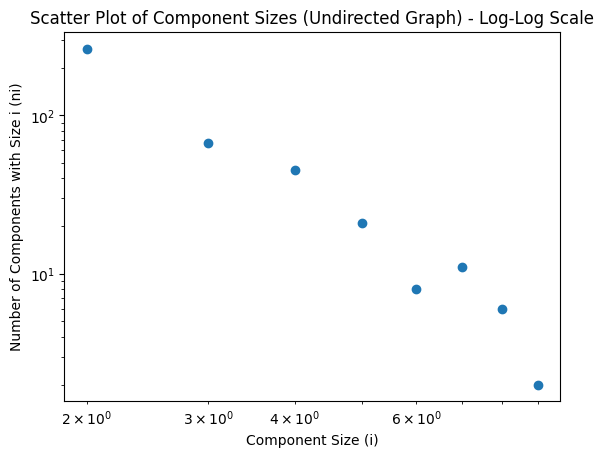

In [148]:
# Get the connected components
components = nx.connected_components(undirected_graph)

# Initialize dictionaries to store the size of each component and the number of components with that size
component_sizes = {}
component_counts = {}

# Iterate over the components and count their sizes
for component in components:
    size = len(component)
    if size not in component_sizes:
        component_sizes[size] = 0
    component_sizes[size] += 1

# Filter out components with size i=1 and count ni=1 and above
filtered_sizes = {size: count for size, count in component_sizes.items() if size > 1 and count > 1}

# Extract x and y values for scatter plot
x_values, y_values = zip(*filtered_sizes.items())

# Plot the scatter plot
plt.scatter(x_values, y_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Component Size (i)')
plt.ylabel('Number of Components with Size i (ni)')
plt.title('Scatter Plot of Component Sizes (Undirected Graph) - Log-Log Scale')
plt.show()